In [1]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [2]:
from sklearn.tree import export_graphviz
import graphviz

In [3]:
import matplotlib.pyplot as plt

In [4]:
data=np.genfromtxt('mnist_train.csv',delimiter=',')
test=np.genfromtxt('mnist_test.csv',delimiter=',')

In [6]:
d_input=data[:,1:]
d_label=data[:,0]
test_input=test[:,1:]
test_label=test[:,0]

In [33]:
t_input,cv_input,t_label,cv_label=train_test_split(d_input,d_label,test_size=0.25,random_state=0)

# varying max depth,min_sample_split on gini criterion On CART

In [6]:
Dtree=DecisionTreeClassifier()
Dtree.fit(t_input,t_label)
Dtree.score(cv_input,cv_label)

0.8642

In [9]:
dot_data = tree.export_graphviz(Dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render() 

'Source.gv.pdf'

In [11]:
Dtree=DecisionTreeClassifier(max_depth=15,min_samples_split=0.10)
Dtree.fit(t_input,t_label)
Dtree.score(cv_input,cv_label)

0.617

In [12]:
Dtree=DecisionTreeClassifier(max_depth=15,min_samples_split=5)
Dtree.fit(t_input,t_label)
Dtree.score(cv_input,cv_label)

0.8672666666666666

0.8671333333333333


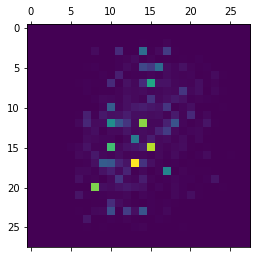

In [10]:
Dtree=tree.DecisionTreeClassifier(max_depth=15)
Dtree.fit(t_input,t_label)
print(Dtree.score(cv_input,cv_label))
importance=Dtree.feature_importances_
plt.matshow(importance.reshape(28,28))

# varying max depth,min_sample_split on entropy criterion

In [14]:
Dtree=DecisionTreeClassifier(criterion='entropy')
Dtree.fit(t_input,t_label)
Dtree.score(cv_input,cv_label)

0.8674666666666667

In [15]:
Dtree=DecisionTreeClassifier(criterion='entropy',max_depth=15)
Dtree.fit(t_input,t_label)
Dtree.score(cv_input,cv_label)

0.8684

In [16]:
Dtree=DecisionTreeClassifier(criterion='entropy',max_depth=32)
Dtree.fit(t_input,t_label)
Dtree.score(cv_input,cv_label)

0.8682666666666666

In [17]:
Dtree=DecisionTreeClassifier(criterion='entropy',max_depth=10)
Dtree.fit(t_input,t_label)
Dtree.score(cv_input,cv_label)

0.8607333333333334

# Varying  on gini criterion

## varing max_depth(GINI)

In [34]:
maxScore=0
max_i=-1
for i in range(2,50):
    Dtree=tree.DecisionTreeClassifier(max_depth=i, random_state=0)
    Dtree.fit(t_input,t_label)
    score=Dtree.score(cv_input,cv_label)
    if(score>maxScore):
        maxScore=score
        max_i=i
print(maxScore)
print(max_i)

0.8684666666666667
14


## varing min_sample_split from 0.001 to 0.01 , max_depth=14(GINI)

In [37]:
maxScore=0
max_i=-1
i=0.001
while i<= 0.01:
    Dtree=tree.DecisionTreeClassifier(max_depth=14,min_samples_split=i, random_state=0)
    Dtree.fit(t_input,t_label)
    score=Dtree.score(cv_input,cv_label)
    if(score>maxScore):
        maxScore=score
        max_i=i
    i=i+0.001

In [38]:
print(maxScore)
print(max_i)

0.8543333333333333
0.001


## varing min_sample_split from 2 to 50 , max_depth=14(GINI)

In [39]:
maxScore=0
max_i=-1
for i in range(2,50):
    Dtree=tree.DecisionTreeClassifier(max_depth=14,min_samples_split=i, random_state=0)
    Dtree.fit(t_input,t_label)
    score=Dtree.score(cv_input,cv_label)
    if(score>maxScore):
        maxScore=score
        max_i=i

In [41]:
print(maxScore)
print(max_i)

0.8684666666666667
2


## varing min_sample_leaf from 1 to 50, min_sample_split=2 , max_depth=14(GINI)

In [42]:
maxScore=0
max_i=-1
for i in range(1,50):
    Dtree=tree.DecisionTreeClassifier(max_depth=14,min_samples_split=2, min_samples_leaf=i, random_state=0)
    Dtree.fit(t_input,t_label)
    score=Dtree.score(cv_input,cv_label)
    if(score>maxScore):
        maxScore=score
        max_i=i

In [43]:
print(maxScore)
print(max_i)

0.8684666666666667
1


## GINI-max_depth=14,min_sample_split=2,min_sample_leaf=1(TEST)

In [13]:
Dtree=tree.DecisionTreeClassifier(max_depth=14,min_samples_split=2, min_samples_leaf=1, random_state=0)
Dtree.fit(d_input,d_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [14]:
Dtree.score(test_input,test_label)

0.8822

## using default of SKLEARN on TEST

In [48]:
Dtree=tree.DecisionTreeClassifier(random_state=0)
Dtree.fit(d_input,d_label)
Dtree.score(test_input,test_label)

0.8781

# Varying  on Entropy criterion

## using default of SKLEARN on TEST

In [49]:
Dtree=tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
Dtree.fit(d_input,d_label)
Dtree.score(test_input,test_label)

0.8864

## varing max_depth(ENTROPY)

In [50]:
maxScore=0
max_i=-1
for i in range(2,50):
    Dtree=tree.DecisionTreeClassifier(max_depth=i, random_state=0, criterion='entropy')
    Dtree.fit(t_input,t_label)
    score=Dtree.score(cv_input,cv_label)
    if(score>maxScore):
        maxScore=score
        max_i=i
print(maxScore)
print(max_i)

0.8738
14


## varing min_sample_split from 2 to 50 , max_depth=14(ENTROPY)

In [51]:
maxScore=0
max_i=-1
for i in range(2,50):
    Dtree=tree.DecisionTreeClassifier(max_depth=14, random_state=0, criterion='entropy', min_samples_split=i)
    Dtree.fit(t_input,t_label)
    score=Dtree.score(cv_input,cv_label)
    if(score>maxScore):
        maxScore=score
        max_i=i
print(maxScore)
print(max_i)

0.8757333333333334
5


## varing min_sample_leaf from 1 to 50, min_sample_split=5 , max_depth=14(ENTROPY)

In [52]:
maxScore=0
max_i=-1
for i in range(2,50):
    Dtree=tree.DecisionTreeClassifier(max_depth=14, random_state=0, criterion='entropy', min_samples_split=5, min_samples_leaf=i)
    Dtree.fit(t_input,t_label)
    score=Dtree.score(cv_input,cv_label)
    if(score>maxScore):
        maxScore=score
        max_i=i
print(maxScore)
print(max_i)

0.8742666666666666
4


## ENTROPY-max_depth=14,min_sample_split=5,min_sample_leaf=4(TEST)

In [53]:
Dtree=tree.DecisionTreeClassifier(max_depth=14, random_state=0, criterion='entropy', min_samples_split=5, min_samples_leaf=4)
Dtree.fit(d_input,d_label)
Dtree.score(test_input,test_label)

0.8883

# K_FOLD crsoos validation for CART Descision Tree

## (1) On GINI criterion 

### Varying max_depth

In [7]:
kfold=KFold(n_splits=5, shuffle=False, random_state=None)
kfold.get_n_splits=(d_input,d_label)

In [8]:
maxScore=[]
max_depth=[]
for train_index, cv_index in kfold.split(d_input,d_label):
    max_s=0
    max_d=-1
    X_train,X_cv = d_input[train_index],d_input[cv_index]
    Y_train,Y_cv=d_label[train_index], d_label[cv_index]
    for i in range(5,36):
        Dtree=tree.DecisionTreeClassifier(max_depth=i,random_state=0)
        Dtree.fit(X_train,Y_train)
        score=Dtree.score(X_cv,Y_cv)
        if(score>max_s):
            max_s=score
            max_d=i
    maxScore.append(max_s)
    max_depth.append(max_d)

In [9]:
maxScore

[0.8748333333333334,
 0.8681666666666666,
 0.8675,
 0.8670833333333333,
 0.8806666666666667]

In [10]:
max_depth

[15, 13, 28, 16, 16]

In [11]:
Dtree=tree.DecisionTreeClassifier(max_depth=16, random_state=0)
Dtree.fit(d_input,d_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [12]:
Dtree.score(test_input,test_label)

0.8816

In [15]:
importance=Dtree.feature_importances_

In [20]:
importance.min()

0.0